# T-Shirt Clustering Demonstration

This notebook demonstrates how to use the k-means algorithm to cluster Star Wars characters based on height and mass for t-shirt sizing.

## Import Required Libraries

Import the necessary libraries including matplotlib, pandas, and scikit-learn.

In [1]:
# Import the required libraries.
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans

## Load and Prepare Data

Load the Star Wars dataset and extract relevant features for clustering.

In [2]:
# Define the colors to be used in the plot.
colors = [
    "#2580B7", # Blue
    "#F59B11", # Yellow
    "#C03B26", # Red
    "#44546A", # Gray
]

# Load the dataset.
data = pd.read_csv("./data/starwars.csv")

# Extract the relevant columns.
height_mass_data = data[["height", "mass"]].dropna()

## Remove Outliers

Remove outliers using standard deviation to clean the data.

In [3]:
# Remove outliers using standard deviation
mean_mass = height_mass_data["mass"].mean()
std_mass = height_mass_data["mass"].std()

height_mass_clen_data = height_mass_data[
    (height_mass_data["mass"] > mean_mass - 3 * std_mass) &
    (height_mass_data["mass"] < mean_mass + 3 * std_mass)
]

## K-Means on Original Data

Perform K-Means clustering on the original dataset with outliers.

In [4]:
# Perform K-Means clustering for height_mass_data
kmeans_original = KMeans(n_clusters=3, random_state=42)
kmeans_original.fit(height_mass_data)
clusters_original = kmeans_original.predict(height_mass_data)

# Add the cluster information to the original dataset
height_mass_data["Cluster"] = clusters_original

## Visualize Original Data Clustering

Plot the clustering results for the original dataset.

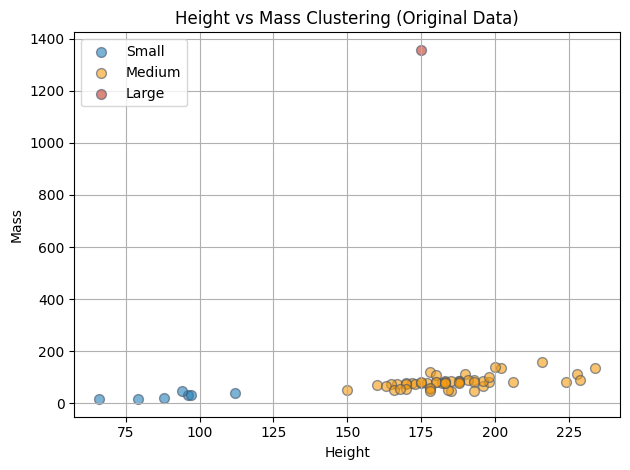

In [5]:
# Plot for original data.
labels = ["Small", "Medium", "Large"]
for i, uid in enumerate([2, 0, 1]):
    plt.scatter(
        height_mass_data[height_mass_data["Cluster"] == uid]["height"],
        height_mass_data[height_mass_data["Cluster"] == uid]["mass"],
        c=colors[i], s=50, edgecolor=colors[-1], alpha=0.6, label=labels[i]
    )

plt.legend(loc="upper left")
plt.grid(True)
plt.xlabel("Height")
plt.ylabel("Mass")
plt.title("Height vs Mass Clustering (Original Data)")
plt.tight_layout()
plt.show()

## K-Means on Cleaned Data

Perform K-Means clustering on the cleaned dataset without outliers.

In [6]:
# Perform K-Means clustering for height_mass_clen_data
kmeans_cleaned = KMeans(n_clusters=3, random_state=42)
kmeans_cleaned.fit(height_mass_clen_data)
clusters_cleaned = kmeans_cleaned.predict(height_mass_clen_data)

# Add the cluster information to the cleaned dataset
height_mass_clen_data["Cluster"] = clusters_cleaned

/var/folders/q3/2tkw4wl936l357n57y8sx0x80000gn/T/ipykernel_12439/1079599235.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  height_mass_clen_data["Cluster"] = clusters_cleaned


## Visualize Cleaned Data Clustering

Plot the clustering results for the cleaned dataset showing improved grouping.

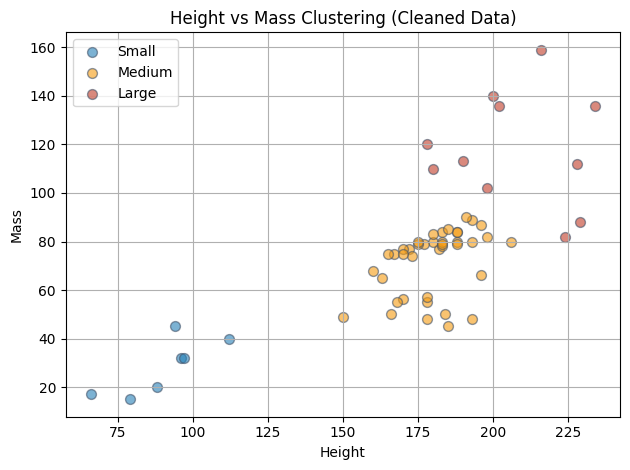

In [7]:
# Plot for cleaned data.
for i, uid in enumerate([1, 0, 2]):
    plt.scatter(
        height_mass_clen_data[
            height_mass_clen_data["Cluster"] == uid]["height"],
        height_mass_clen_data[
            height_mass_clen_data["Cluster"] == uid]["mass"],
        c=colors[i], s=50, edgecolor=colors[-1], alpha=0.6, label=labels[i]
    )

plt.legend(["Small", "Medium", "Large"], loc="upper left")
plt.grid(True)
plt.xlabel("Height")
plt.ylabel("Mass")
plt.title("Height vs Mass Clustering (Cleaned Data)")
plt.tight_layout()
plt.show()